# Quang Phu Nguyen (22046596)
- Run the code by using Run all cells.
- Only cell 15, you can predict values by inputting the number of the degree of weight you want to use.
- All non-code questions are also answered in this file and in the correct order.
- Limitation: Because those model choices were made by me, a person that does not have enough knowledge, it might be a bit different from other's work.

# Task 1: Systolic Pressure (12 point)
## Question 1: Explore and Manipulate the data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Task 1
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score # Calculate MSE
# Task 2
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score

In [8]:
# Import data in Pandas form, make sure having the same namefile
pressure = pd.read_csv("bloodpressure.csv") 
pressure.head()

,ID-NUMBER,AGE,ED-LEVEL,SMOKING STATUS,EXERCISE,WEIGHT,SERUM-CHOL,SYSTOLIC,IQ,SODIUM,GENDER,MARITAL-STATUS,NAME
0,1,27,2,1,1,120,193,126,118,136,F,M,"Braund, Mr. Owen Harris"
1,2,18,1,0,1,145,210,120,105,137,M,S,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,32,2,0,0,118,196,128,115,135,F,M,"Heikkinen, Miss. Laina"
3,4,24,2,0,1,162,208,129,108,142,M,M,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,19,1,2,0,106,188,119,106,133,F,S,"Allen, Mr. William Henry"


In [9]:
systolic = pressure['SYSTOLIC']
systolic = systolic.to_numpy().reshape(-1, 1)

In [10]:
pressure_predictor = pressure.drop(["ID-NUMBER", "SYSTOLIC", "NAME"], axis=1)
pressure_predictor.head()

,AGE,ED-LEVEL,SMOKING STATUS,EXERCISE,WEIGHT,SERUM-CHOL,IQ,SODIUM,GENDER,MARITAL-STATUS
0,27,2,1,1,120,193,118,136,F,M
1,18,1,0,1,145,210,105,137,M,S
2,32,2,0,0,118,196,115,135,F,M
3,24,2,0,1,162,208,108,142,M,M
4,19,1,2,0,106,188,106,133,F,S


In [11]:
# Dummies for multiple linear regression part
pressure_predictor = pd.get_dummies(pressure_predictor, drop_first=True) 
# To keep all values in the numeric value
# Change categorical value to integer to use the linear regression (categorical value do not work)
pressure_predictor["GENDER_M"] = pressure_predictor["GENDER_M"].astype(np.int8)
pressure_predictor["MARITAL-STATUS_M"] = pressure_predictor["MARITAL-STATUS_M"].astype(np.int8)
pressure_predictor["MARITAL-STATUS_S"] = pressure_predictor["MARITAL-STATUS_S"].astype(np.int8)
pressure_predictor["MARITAL-STATUS_W"] = pressure_predictor["MARITAL-STATUS_W"].astype(np.int8)
pressure_predictor.head()

,AGE,ED-LEVEL,SMOKING STATUS,EXERCISE,WEIGHT,SERUM-CHOL,IQ,SODIUM,GENDER_M,MARITAL-STATUS_M,MARITAL-STATUS_S,MARITAL-STATUS_W
0,27,2,1,1,120,193,118,136,0,1,0,0
1,18,1,0,1,145,210,105,137,1,0,1,0
2,32,2,0,0,118,196,115,135,0,1,0,0
3,24,2,0,1,162,208,108,142,1,1,0,0
4,19,1,2,0,106,188,106,133,0,0,1,0


## Question 2: Polynomial Regression
- a. Create polynomial regression models using the whole dataset to predict systolic pressure using the "WEIGHT" feature, for polynomial degrees ranging from 1 to 14.
- b. Perform 10-fold cross-validation
- c. Compute and display the mean RMSEs of the 10-fold cross-validation for each of the 14 polynomial degrees
- d. Produce a cross-validation error plot showing the mean RMSE for polynomial degrees from 1 to 14

In [13]:
X = pressure_predictor["WEIGHT"].to_numpy().reshape(-1, 1) # Change into numpy value with 1 column and as many rows as needed
y = systolic

In [14]:
poly_List_models = {} # Store polynomial models
poly_positive_mse_10foldcv = {}  # Store MSE
poly_rmse = {} # Store mean of RMSE of each model

for degree in range(1,15):
    # a. Create polynomial regression models to predict Systolic using "Weight", from degree 1 to 14
    poly_features = PolynomialFeatures(degree = degree, include_bias = False)  # Set a standard polynomial feature for each loop
    model = Pipeline([
        ("poly_features", poly_features), # X will be transformed into X_poly with corresponding degree
        ("lin_reg", LinearRegression()),  # Then X_poly will be put in the LinearRegression
    ])
    model.fit(X,y) # Transforming then Fitting
    poly_List_models[f'model{degree}'] = model # Storing

    # b. 10-fold cross validation
    positive_mse_scores = -cross_val_score(model, # Fitted from Pipeline
                                           X, y, scoring='neg_mean_squared_error', cv=10)
    poly_positive_mse_10foldcv[f'MSE{degree}'] = positive_mse_scores # Storing

    # c. RMSEs of 10-fold CV for each degree
    rmse_scores = np.sqrt(positive_mse_scores)
    mean_rmse_scores = np.mean(rmse_scores)
    poly_rmse[f'RMSE{degree}'] = mean_rmse_scores # Storing

In [15]:
# Testing for prediction a random degree
testing_degree = input('Enter a degree from 1-14:')
model_degree = 'model'+testing_degree

testing_model = poly_List_models[model_degree]

X_new = [[120], [100], [150]]

testing_model.predict(X_new)

Enter a degree from 1-14: 5


array([[123.26079107],
       [113.37949757],
       [131.72119164]])

RMSE of 14 models dict_values([10.063566348213604, 10.187166706053542, 10.470321681840364, 10.829963377150463, 10.45133716702582, 10.4018597256369, 10.329004499108617, 10.240305476454346, 10.159177954821084, 10.130294263447153, 10.240212879403142, 10.712133802678924, 12.002013373747856, 14.697035935941656])


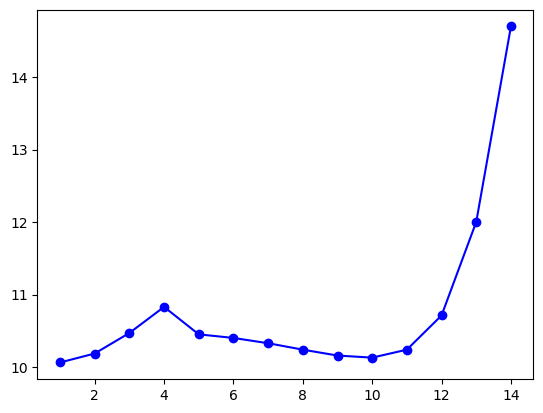

In [16]:
# d. Visualisation
print('RMSE of 14 models', poly_rmse.values())
plt.plot(range(1,15), poly_rmse.values(), "bo-")

## Question 3: Model selection for polynomial regression
- a. Select the best polynomial degree and briefly explain your choice
- b. Print the intercept and coefficients of the selected model

In [18]:
# a. Choose best model
list_poly_rmse = np.array(list(poly_rmse.values()))
index_poly_rmse = np.argsort(list_poly_rmse)+1 
# Index start at 0, plus 1 to make it easier to read
index_poly_rmse

array([ 1, 10,  9,  2, 11,  8,  7,  6,  5,  3, 12,  4, 13, 14])

Consider first four degree because they give the smallest RMSE among 14 degrees.
- Degree 10 and 9 would be a bit overfitting so they will be ignored
- Then having a look at the below graph to see how degree 1 and 2 work

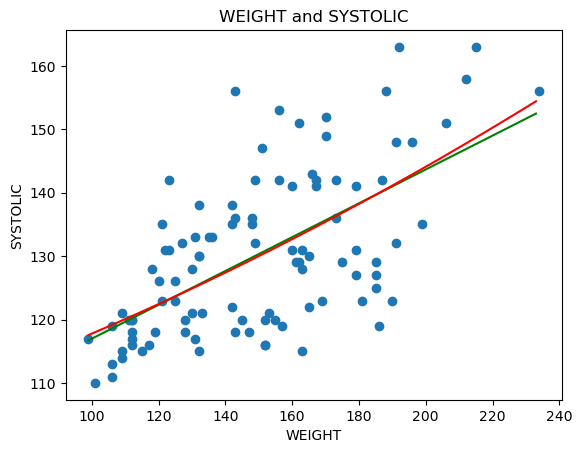

In [20]:
X_plot = np.array(range( 99, 234, 1)) # min and max of X
## Take intercepts and coefficients in the draft and only show the best one below
y_degree1 = 90.28431413226751 + 0.2669545938540424*X_plot
y_degree2 = 98.911250919365 + 0.15125235*X_plot + 0.00037347 * X_plot**2
## Visualising
plt.scatter(X, y) # orginal data in blue
plt.plot(X_plot, y_degree1, 'g') # degree 1 in green
plt.plot(X_plot, y_degree2, 'r') # degree 2 in red
plt.xlabel('WEIGHT')
plt.ylabel('SYSTOLIC')
plt.title('WEIGHT and SYSTOLIC')
plt.show()

2 models produce a relatively similar in the the regression line. Although model of degree 1 indeed offers a smaller amount of RMSE, I would rather go to model of degree 2. 
- Model 1, which is basically linear, could be underfitting in some extent because when looking at the graph above, we could see there is no clear pattern of a basic linearity.
- On the other hand, despite having a slightly higher number in RMSE, it could still serve the same regression as model 1 does in the particular range. Besides, when the value X (Weight) reach 200-ish, the red model (degree 2) could identify the difference and start moving up in the line graph.
- Therefore, the model with degree 2 will be chosen.

In [22]:
best_degree = 2
print("Degree", best_degree)

Degree 2


In [23]:
# b. Print intercept and coefficients of the model
best_model = poly_List_models['model'+str(best_degree)]  
# Result would be the Pipeline with 2 steps: Poly transform and Linear regression
lin_reg_best_model = best_model.named_steps['lin_reg']   # Only access the Linear Regression step

intercept = lin_reg_best_model.intercept_[0]
coefficients_1 = lin_reg_best_model.coef_[0,0]
coefficients_2 = lin_reg_best_model.coef_[0,1]
print("Intercept", intercept)
print("Coefficients", coefficients_1, 'and', coefficients_2)
print(f'Best equation: Systolic = {intercept} + {coefficients_1} Weight + {coefficients_2} Weight^2')

Intercept 98.911250919365
Coefficients 0.15125234579213007 and 0.00037346540241700046
Best equation: Systolic = 98.911250919365 + 0.15125234579213007 Weight + 0.00037346540241700046 Weight^2


## Question 4: Multiple Linear Regression
- a. Create a multiple linear regression model to predict systolic pressure using all the other relevant useful features in the dataset.
- b. Print the intercept and coefficients of the model.
- c. Perform 10-fold cross-validation.
- d. Compute and display the mean RMSE for the 10-fold cross-validation

In [25]:
y_multi = systolic # Different name for different model, but the same value
X_multi = pressure_predictor.to_numpy() # Whole remaining dataset, including dummies

In [26]:
# a. Create model with all other features
lin_reg_multi = LinearRegression()
lin_reg_multi.fit(X_multi, y_multi)

LinearRegression()

In [27]:
# b. Intercept and Coefficients
multi_intercept = lin_reg_multi.intercept_[0]
multi_coefficients = lin_reg_multi.coef_
print("Intercept", multi_intercept)
print("Coefficients", multi_coefficients)

Intercept 69.14256088196578
Coefficients [[  0.37180203  -0.83445173  -0.08319725  -0.11105294   0.3004112
    0.01360296  -0.05463374   0.08452103 -10.87181364   0.60239764
   -0.11053997  -4.47617349]]


In [28]:
# c. 10-fold cross-validation
mse_score_multi = -cross_val_score(lin_reg_multi, X_multi, y_multi, cv=10, scoring='neg_mean_squared_error')
print("MSE scores for 10-fold:", mse_score_multi)
# d. mean RMSE
rmse_multi = np.mean(np.sqrt(mse_score_multi))
print("Mean RMSE:", rmse_multi)

MSE scores for 10-fold: [75.42004641 53.94956458 74.57654424 39.51401931 55.51622802 50.61795498
 32.80881046 74.47990128 67.63895163 54.308156  ]
Mean RMSE: 7.546861673936118


## Question 5: Ridge Regression
- a. Build a Ridge regression model for the multiple linear regression model created in item 4 with a regularization parameter $\alpha =0.1$
- b. Print the intercept and coefficients of the model
- c. Perform 10-fold cross-validation
- d. Compute and display the mean RMSE for the 10-fold cross-validation.

In [30]:
y_ridge = systolic # Different name for different model, but the same value
X_ridge = pressure_predictor.to_numpy() # Whole remaining dataset with dummies
alpha = 0.1

In [31]:
# a. Ridge model with alpha = 0.1
ridge_reg = Ridge(alpha = alpha, solver = "cholesky") # Update new alpha
ridge_reg.fit(X_ridge, y_ridge)

# b. Intercept and Coefficients
ridge_intercept = ridge_reg.intercept_[0]
ridge_coefficients = ridge_reg.coef_
print("Intercept", ridge_intercept)
print("Coefficients", ridge_coefficients)

Intercept 69.13966661213357
Coefficients [[  0.3722703   -0.83170596  -0.07951758  -0.12025351   0.29872371
    0.0134391   -0.05442173   0.08578891 -10.76454194   0.62400999
   -0.09656377  -4.38823966]]


In [32]:
# c. 10-fold cross-validation
mse_score_ridge = -cross_val_score(ridge_reg, X_ridge, y_ridge, cv=10, scoring='neg_mean_squared_error')
print("MSE scores for 10-fold:", mse_score_ridge)
# d. mean RMSE
rmse_ridge = np.mean(np.sqrt(mse_score_ridge))
print("Mean RMSE:", rmse_ridge)

MSE scores for 10-fold: [75.70264387 54.27396138 74.3962837  39.42073141 55.04450843 50.61497325
 32.37145079 74.43886849 67.6710702  54.38217405]
Mean RMSE: 7.5423410378856115


## Question 6: Model Comparison
Best RMSE of 3 models to predict Systolic are:
- 10.187166706053542 of **Polynomial Regression Model** with **degree 2** for Weight
- 7.546861673936118 of **Multiple Linear Regression Model** with all features considered
- 7.5423410378856115 of **Ridge Regression Model** with all features considered

I choose Ridge Regression because of some of following reasons:
- Ridge Regression has the lowest score in terms of Mean RMSE compared to other methods
- Polynomial Regression only uses 1 variable to predict while Systolic pressure could be derived from multiple factors
- Some features in Multiple Linear Regression may have multicollinearity, for example: EXERCISE and WEIGHT, WEIGHT and SERUM-CHOL, AGE and IQ. Hence using Ridge Regression could handle multicollinearity by adjusting coefficients of those correlated features for better prediction.

# Task 2: MNIST Digit Classification (8 point)

#### 1. Load the renowned MNIST (’mnist 784’) dataset, which consists of a large collection of handwritten digit images. Your task is to reduce the number of features first, and then build a binary classification model to distinguish between the digit “7” and all other digits (not “7”).

In [36]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
print(list(mnist.keys()))

['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url']


In [37]:
print(mnist["data"])
print(mnist["target"]) # type: object

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['5' '0' '4' ... '4' '5' '6']


In [38]:
X = mnist["data"]     # predictor variables
y = mnist["target"]   # target variable
y = (y == '7')        # '7' is object varible instead of number
# Change value into True if it is '7'. Otherwise, it will be False
y = y.astype(np.int8) # 1 when True. 0 when False
print(y)

[0 0 0 ... 0 0 0]


#### 2. Perform Principal Component Analysis (PCA) on the feature data to reduce its dimensionality while retaining 90% of the overall explained variance.

In [40]:
pca = PCA(n_components = 0.9)
X_reduced = pca.fit_transform(X)

#### 3. Split the data into training and testing sets, using a common split ratio of 80% for training and 20% for testing.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.2)

In [43]:
### Check size and number of observation having value 7
print(y.shape)   # Size 70000 x (1)
print(np.sum(y)) # In 70000 values, there are 7293 values 1 (representing for '7')

print(X.shape)         # Size 70000 x 784
print(X_reduced.shape) # Size 70000 x 87 
                       # Decrease from 784 features to 87 features with 90% remaining

(70000,)
7293
(70000, 784)
(70000, 87)


#### 4. Create a Logistic Regression model using the reduced feature dataset.

In [45]:
log_reg = LogisticRegression(max_iter = 100000) 
# max_iter = 70000 make sure it take all into consideration
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

#### 5. Use this model to predict the labels for both the training and testing dataset.

In [47]:
train_prediction = log_reg.predict(X_train)
test_prediction = log_reg.predict(X_test)

#### 6. Print the number of principal components preserved. Print the prediction accuracy (proportion of correct predictions) of your model on the training set. Also, print the prediction accuracy, the confusion matrix, and the misclassified digits (i.e. wrong predicitons) of your model on the testing set.

In [49]:
print("PCs preserved:", X_reduced.shape[1], "\n")

print("Training set Prediction \n", confusion_matrix(train_prediction, y_train))
print("Training Precision of classifier:", round(precision_score(y_train, train_prediction),4))
print("Training Accuracy rate:", round(accuracy_score(y_train, train_prediction),4))

print("\nTesting set Prediction \n", confusion_matrix(test_prediction, y_test))
print("Testing Precision of classifier:", round(precision_score(y_test, test_prediction),4))
print("Testing Accuracy rate:", round(accuracy_score(y_test, test_prediction),4))

index_misclassed_digits = np.where(test_prediction != y_test)
index_string = ', '.join(map(str, index_misclassed_digits[0]))
print("\nThe model classifies wrong", len(index_misclassed_digits[0]), "places for testing dataset at indexes:", index_string)

PCs preserved: 87 

Training set Prediction 
 [[49897   526]
 [  293  5284]]
Training Precision of classifier: 0.9475
Training Accuracy rate: 0.9854

Testing set Prediction 
 [[12422   146]
 [   95  1337]]
Testing Precision of classifier: 0.9337
Testing Accuracy rate: 0.9828

The model classifies wrong 241 places for testing dataset at indexes: 35, 37, 337, 374, 511, 521, 619, 626, 655, 750, 751, 788, 909, 939, 1025, 1320, 1354, 1476, 1507, 1529, 1533, 1599, 1612, 1654, 1800, 1876, 1999, 2008, 2061, 2099, 2125, 2195, 2213, 2259, 2309, 2318, 2331, 2339, 2347, 2591, 2621, 2677, 2700, 2758, 2826, 2879, 2888, 2910, 2921, 3067, 3198, 3314, 3341, 3375, 3391, 3430, 3663, 3761, 3776, 3797, 3821, 3822, 3851, 3925, 3926, 4027, 4033, 4062, 4064, 4072, 4085, 4088, 4129, 4164, 4167, 4368, 4372, 4458, 4482, 4603, 4646, 4751, 4756, 4790, 4846, 4909, 4932, 4993, 5053, 5179, 5232, 5356, 5597, 5598, 5609, 5776, 6013, 6036, 6102, 6144, 6167, 6269, 6281, 6394, 6455, 6570, 6641, 6655, 6689, 6692, 6767, 681

#### 7. Evaluate the model: What do you think of the model generated (good, underfitting, overfitting)? Briefly explain your reasoning.

In my opinion, this model works well due to the high accuracy rate in both training and validating data. Although I only used PCA with 90% of explained variance (reducing dimension to 87 remaining from 784 original features), it still achieves a high level of predicting accuracy (around 98%), which is really impressive. On top of that, when reducing dimensions, it could keep the model from being overfitting, and 90% is a sufficient number of features to keep the model good, instead of being underfitting.